In [27]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [28]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import time

In [29]:
#from tensorflow.keras import models
#from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [30]:
df_input = pd.read_csv("CD3D_100-150℃_0.2-1.6mm_0.4-0.9V_std", usecols=[1,2,3,4,5,6])

In [31]:
df_output = pd. read_csv("CD3D_100-150℃_0.2-1.6mm_0.4-0.9V", usecols=[7])

In [32]:
df_input.shape

(5940000, 6)

In [33]:
df_output.shape

(5940000, 1)

In [34]:
x_train, x_test, y_train, y_test = train_test_split(df_input, df_output, test_size=0.1, random_state=0)

In [35]:
print(x_train.shape,x_test.shape)

(5346000, 6) (594000, 6)


In [36]:
x_train

,x座標,y座標,z座標,V[V],T_cell[℃],W_ch[mm]
5398873,-0.725381,-1.457382,-0.386858,-9.486833e-01,1.46385,-0.267261
5593541,-0.950124,1.710197,0.019343,1.581139e+00,1.46385,-0.267261
1157183,-0.013693,-0.126999,0.902670,-3.162278e-01,-0.87831,-1.069045
4758896,-0.159360,-1.199858,-1.401718,2.808667e-15,0.87831,1.336306
5713770,2.129693,1.646846,-1.418481,-9.486833e-01,1.46385,1.336306
...,...,...,...,...,...,...
2249467,-0.862724,-0.374387,1.418482,1.264911e+00,-0.29277,-1.069045
5157699,-0.779486,0.173604,1.094810,6.324555e-01,1.46385,-1.069045
2215104,-1.145734,-0.570460,1.388823,3.162278e-01,-0.29277,-1.069045
1484405,0.098678,-0.697163,-0.644764,-3.162278e-01,-0.87831,-0.267261


In [37]:
y_train

,i[A/m^2]
5398873,19442.601314
5593541,2065.691483
1157183,10227.007299
4758896,6683.722003
5713770,171.972111
...,...
2249467,1320.610081
5157699,7631.123529
2215104,6594.117734
1484405,8238.851449


In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import regularizers, initializers

model = Sequential()

weights = [com.get_weights() for com in model.layers[0:]]  #重さを抽出（※始めに回すときだけ下の行と入れ替える）



model.add(Dense(units=32, input_shape=(6,), activation='relu'))  
model.add(Dense(units=10, activation='relu'))  #
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=1, activation='linear'))  #隠れ層3層でやってみる

model.compile(loss='mean_absolute_error',    
              optimizer='adam',             #とりあえずadamで
              metrics=['mae'],
              run_eagerly=False)   #計算時間5倍くらいかかる

In [39]:
start_time = time.time()
callbacks1 = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_mae',
                            factor=0.2,
                            patience=5,
                            mode="auto",
                            min_lr=0.00001) #最初は0.001だった
callbacks2 = tf.keras.callbacks.EarlyStopping(monitor="val_mae",
                                              patience=5, #20→5
                                              mode="auto")
history =  model.fit(x=x_train,
                     y=y_train,
                     epochs = 20000,
                     batch_size=200,
                     validation_data=(x_test, y_test),
                     callbacks=[callbacks1,callbacks2])
end_time = time.time()
elapsed_time = end_time - start_time   #経過時間を計算して表示
print(f"計算にかかった時間: {elapsed_time}秒")

Epoch 1/20000
26730/26730 [==============================] - 43s 2ms/step - loss: 730.7924 - mae: 730.7924 - val_loss: 297.6403 - val_mae: 297.6403 - lr: 0.0010
Epoch 2/20000
26730/26730 [==============================] - 38s 1ms/step - loss: 247.1337 - mae: 247.1337 - val_loss: 197.8310 - val_mae: 197.8310 - lr: 0.0010
Epoch 3/20000
26730/26730 [==============================] - 38s 1ms/step - loss: 171.2878 - mae: 171.2878 - val_loss: 154.0339 - val_mae: 154.0339 - lr: 0.0010
Epoch 4/20000
26730/26730 [==============================] - 37s 1ms/step - loss: 148.8576 - mae: 148.8576 - val_loss: 145.7508 - val_mae: 145.7508 - lr: 0.0010
Epoch 5/20000
26730/26730 [==============================] - 38s 1ms/step - loss: 139.9353 - mae: 139.9353 - val_loss: 134.8091 - val_mae: 134.8091 - lr: 0.0010
Epoch 6/20000
26730/26730 [==============================] - 75s 3ms/step - loss: 130.1803 - mae: 130.1803 - val_loss: 127.9940 - val_mae: 127.9940 - lr: 0.0010
Epoch 7/20000
26730/26730 [=======

In [44]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae', 'lr'])

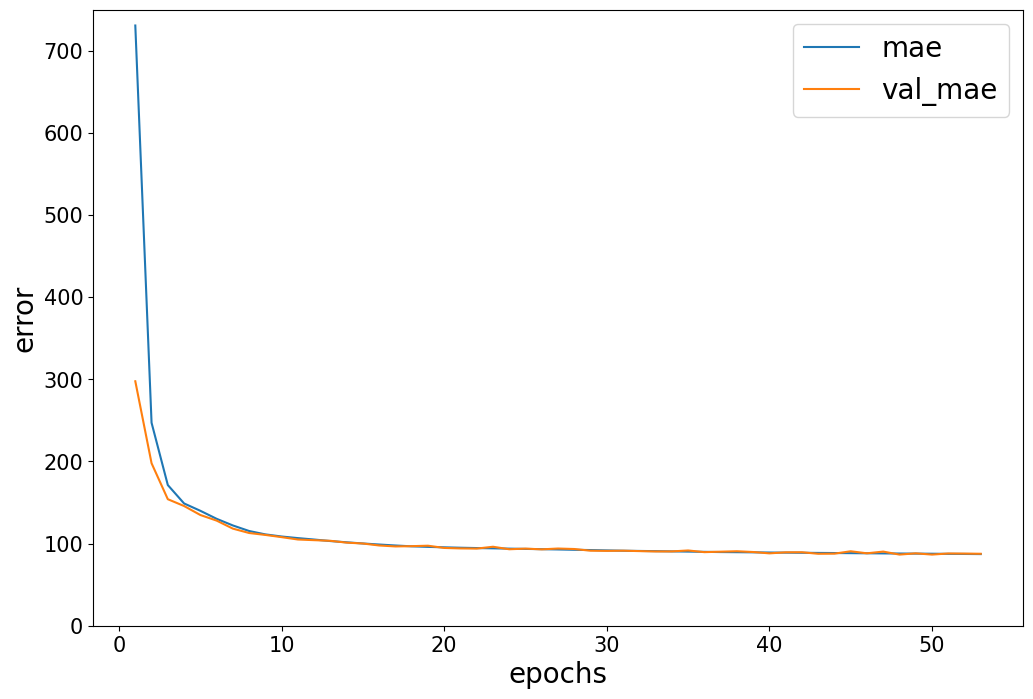

In [46]:
mae = history_dict['mae']
val_mse = history_dict['val_mae']
epochs = range(1, len(mae) + 1)

plt.rcParams["font.size"] = 15
plt.figure(figsize=(12, 8))
plt.plot(epochs, mae, label='mae')
plt.plot(epochs, val_mse, label='val_mae')
plt.xlabel("epochs",fontsize=20)
plt.ylabel("error",fontsize=20)
plt.ylim((0,750))
plt.legend(loc = 'best',fontsize=20)
#plt.savefig('mae_transition.png')
plt.show()

In [47]:
weights = [com.get_weights() for com in model.layers[0:]] 
model.layers[0].set_weights(weights[0])
model.layers[1].set_weights(weights[1])
model.layers[2].set_weights(weights[2])

In [48]:
model.save('i_predict CD_3Ddist2')

INFO:tensorflow:Assets written to: i_predict CD_3Ddist2\assets
